In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from icecream import ic
from scipy.ndimage import maximum_filter

In [2]:
song_name = "test_sogs/skyfall_full.mp3"

### Load audio file
Here we will load the audio this will returns the audio time series (y) and the sampling rate (sr)

Here **y** is a numpy array containing the amplitude of the audio signal at each time step
and **sr** is the number of samples per second (the sampling rate)

**Song duration** = Y / sr (Total no. of samples / Samples per second)

In [15]:
y, sr = librosa.load(song_name, sr=44100)

### Compute the spectogram using STFT

In [4]:
spectogram = librosa.stft(y)

### Convert the spectogram's amplitude to decibals
This is done to make the spectrogram more interpretable
It return a 2D array where each column represents the amplitude of the audio signal at a specific time step and frequency bin

### About Spectogram 
The spectogram has **1025 rows** and **24609 columns** and the values are the **amplitude values**. It is a 2D matrix so it can be plotted against a 2D graph. Here the rows are the frequency bins (Windows created by STFT function) and the columns are the time frames.

`Frequency bins =  n_fft used in stft // 2 + 1 = 1025`
##### Note: These frequency bins are lineraly spaced

`total duration of song = (hop_length / sample_rate) * 24609`
##### Note: Here hop length is the length our stft windows hops after processing one window

In [5]:
# Conver the spectogram for visualization only
converted_spectogram = librosa.amplitude_to_db(np.abs(spectogram), ref=np.max)

### Graph
The graph shows frequency bin on the left and time on the bottom. We can see that the time range indicates the audio file's length. On the Y axis we can see the frequency bins (Frequency ranges) it goes upto **Sample Rate // 2**. We can only see upto 16384 because of the way the graph was plotted. The Values are plotted as a heatmap where the sound is realtive to each other the loudest sound is set to the brightest color and so on. The values here are relative to the loudest decibal.

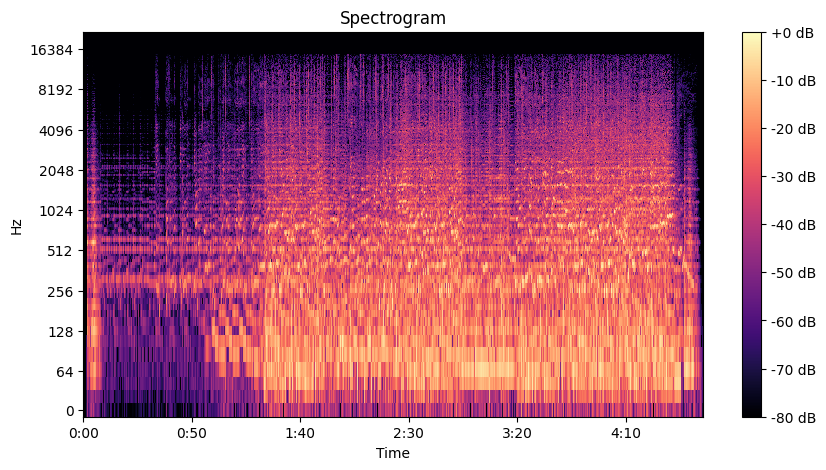

In [6]:
plt.figure(figsize=(10, 5))
librosa.display.specshow(converted_spectogram, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title("Spectrogram")
plt.show("plot.png")

##### Note: The Spectogram contains of complex numbers which include the magnitude and the phase, for creating a fingerprint we dont need the phase of an audio we only need the frequency peaks. so we filter.

to convert a number we use:
value = sqrt(real_part² + imag_part²)

In [7]:
print("Complex number example: ", spectogram[550][50])
print("Same number: ", np.abs(spectogram[550][50]))

# convert all the number in the spectogram to magnitude
sanitized_spectogram = np.abs(spectogram)

# create a small example matrix to test functionality below
example_matrix = [
 [ 3, 4, 1, 8, 7, 19, 25 ],
 [ 2, 9, 5, 18, 3, 4, 6],
 [ 1, 6, 2, 14, 28, 12, 4 ]
]

Complex number example:  (-1.919669e-05+3.004811e-05j)
Same number:  3.565672e-05


### Learning the pattern

For starters lets try to identify the loudest frequency bin in each second on the sound.

##### Total columns: 24609
##### Total rows: 1025

This is how the matrix looks:
```text
[
    [val, val, val, ...],
    [val, val, val, ...],
]
```

#### Idea

So the idea is to change the values in the spectogram to its local max lets say i have this matrix:
```
matrix = [
 [ 3, 4, 1 ],
 [ 2, 9, 5 ],
 [ 1, 6, 2 ]
]
```

So for this matrix if we choose the neighbourhood size of 3, the for each cordinate we have to make it the center of matrix and replace it with the maximum value in that neighbourhood. Lets say for cords(1, 1) the maximum value if centered in a 3x3 matirx is 9 so we replace that value with 9 since it is already there it is not a issue. For edge cases lets say for cords(0, 0) we can't create a neighbourhood of 3x3 with cords(0, 0) in the middle so we reflect the edge values and create a matrix which looks like:

```
matrix = [
 [ 3, 3, 4 ],
 [ 3, 3, 4 ],
 [ 2, 2, 9 ]
]
```

Then the cords(0, 0) is now in center and can be replaced with the local value in the neighbourhood i.e 9.

In [42]:
# (343 << 18) | (429 << 8) | 2 | 5
x = (343 << 18)
y = (343 << 18) | (429 << 8)
z = (343 << 18) | (429 << 8) | 2
ic(x)
ic(y)
ic(z)

ic| x: 89915392
ic| y: 90025216
ic| z: 90025218


90025218

In [47]:
(89915392 >> 8) - (89915392 >> 18)

89915049